In [103]:
# %load start.py
# Load useful extensions

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 2

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -g

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# The usual suspects
import os
import numpy as np
import pandas as pd
from IPython.display import display

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')

# Turn off scientific notation
np.set_printoptions(precision=5, suppress=True)

# Other imports
from lcdblib.plotting import PairGrid, maPlot, corrfunc

last updated: 2017-05-15 
Git hash: 0c206a76f077bb093e14734e2eace454e5a2cf41


In [108]:
# Import metadata
fnSample = '../lcdb-wf/config/sampletable.tsv'
df = pd.read_table(fnSample, index_col=0)
mapper = df.ercc.to_dict()
df

,filename,sex,ercc,num_gonad,amt_carrier,group
samplename,,,,,,
w1118_ovary_1,w1118_LG_f_r1_A_C9.fastq.gz,female,A,1,110,female_A
w1118_ovary_2,w1118_LG_f_r2_B_C10.fastq.gz,female,B,3,90,female_B
w1118_ovary_3,w1118_LG_f_r3_A_C11.fastq.gz,female,A,9,30,female_A
w1118_ovary_4,w1118_LG_f_r4_A_C12.fastq.gz,female,A,27,0,female_A
w1118_testis_1,w1118_LG_m_r1_B_C9.fastq.gz,male,B,1,70,male_B
w1118_testis_2,w1118_LG_m_r2_A_C10.fastq.gz,male,A,2,20,male_A
w1118_testis_3,w1118_LG_m_r3_B_C11.fastq.gz,male,B,3,20,male_B
w1118_testis_4,w1118_LG_m_r4_B_C12.fastq.gz,male,B,4,0,male_B


In [107]:
# import counts
fnCounts = '../data/aggregation/featurecounts.tsv'
df = pd.read_table(fnCounts, index_col=0)

# split into ercc and genes
ercc = df[df.index.str.startswith('ERCC-')].copy()
header = [(mapper[x], x) for x in ercc.columns]
ercc.columns = pd.MultiIndex.from_tuples(header)
genes = df[~df.index.str.startswith('ERCC-')].copy()

# Display Summary
print('There are {:,} erccs and {:,} genes'.format(ercc.shape[0], genes.shape[0]))
display(ercc.head())
display(genes.head())

There are 96 erccs and 17,471 genes


A             B             A                \
           w1118_ovary_1 w1118_ovary_2 w1118_ovary_3 w1118_ovary_4   
FBgn                                                                 
ERCC-00002          1072           752           743           290   
ERCC-00003             3             1             0             0   
ERCC-00004            10             3             0             0   
ERCC-00007             0             0             0             0   
ERCC-00009            95            93            44            17   

                        B              A              B                 
           w1118_testis_1 w1118_testis_2 w1118_testis_3 w1118_testis_4  
FBgn                                                                    
ERCC-00002           1212            173            168            156  
ERCC-00003              0              0              0              0  
ERCC-00004              3              2              0              0  
ERCC-00007              0              0              0              0  
ERCC-00009             96             21             17             11

,w1118_ovary_1,w1118_ovary_2,w1118_ovary_3,w1118_ovary_4,w1118_testis_1,w1118_testis_2,w1118_testis_3,w1118_testis_4
FBgn,,,,,,,,
FBgn0000003,1,0,3,1,1,17,1,1
FBgn0000008,41,256,69,30,2,74,76,99
FBgn0000014,2968,14706,3121,3862,343,227,260,346
FBgn0000015,17,164,83,48,0,19,19,25
FBgn0000017,542,2773,695,643,57,872,1160,1234


## Genic Summary

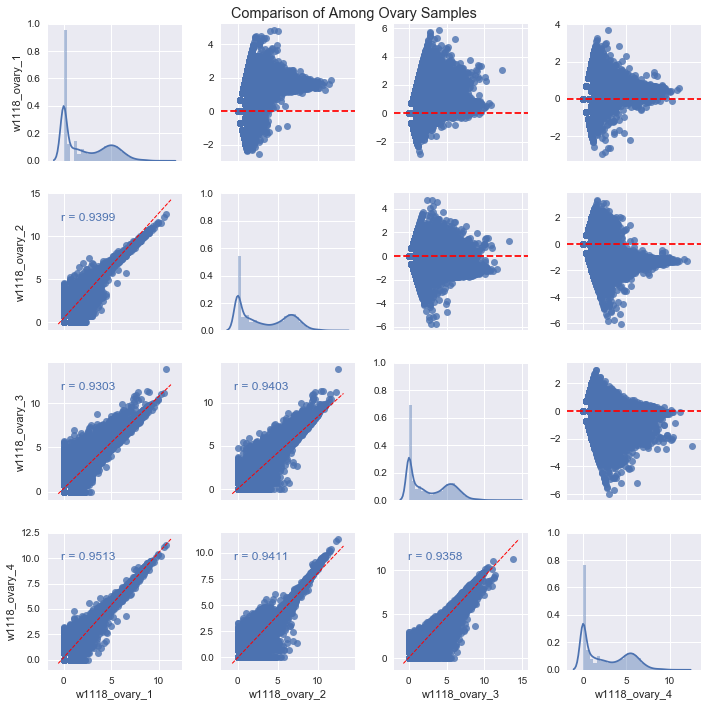

In [112]:
# Plot Ovary samples against each other
ovary = genes.columns.str.contains('ovary')
g = PairGrid(np.log(genes.loc[:, ovary] + 1), subplots_kws={'sharey': False})
g.map_lower(sns.regplot, line_kws={'color': 'red', 'ls': '--', 'lw': 1})
g.map_lower(corrfunc, loc=(0.1, 0.8))
g.map_upper(maPlot)
g.map_diag(sns.distplot)
plt.suptitle('Comparison of Among Ovary Samples');
plt.tight_layout(rect=[0, 0, 1, .98]);

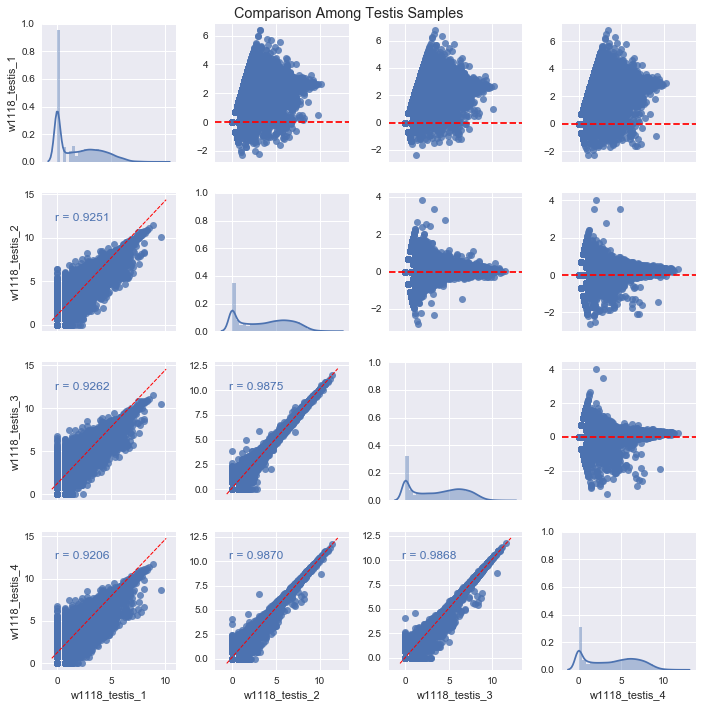

In [124]:
# Plot testis samples against each other
testis = genes.columns.str.contains('testis')
g = PairGrid(np.log(genes.loc[:, testis] + 1), subplots_kws={'sharey': False})
g.map_lower(sns.regplot, line_kws={'color': 'red', 'ls': '--', 'lw': 1})
g.map_lower(corrfunc, loc=(0.1, 0.8))
g.map_upper(maPlot)
g.map_diag(sns.distplot)
plt.suptitle('Comparison Among Testis Samples');
plt.tight_layout(rect=[0, 0, 1, .98]);

## ERCC Summary

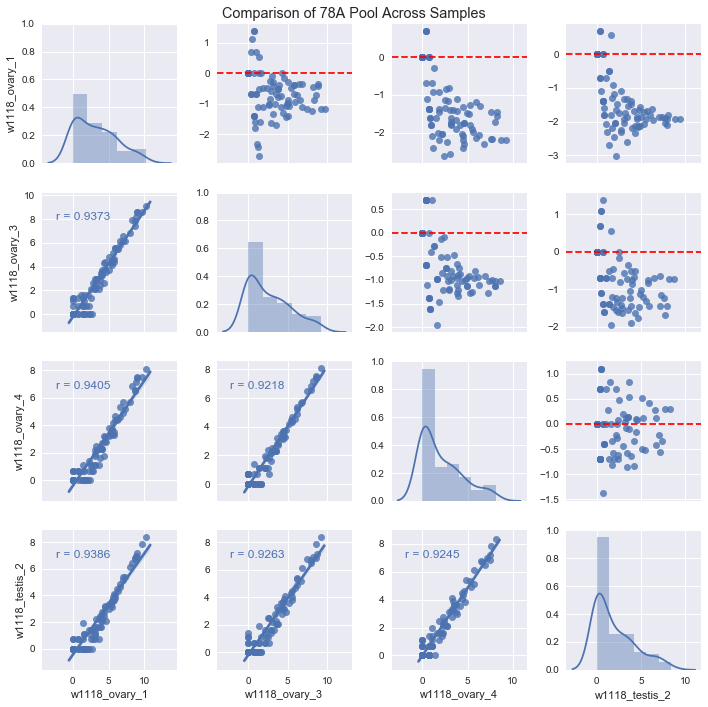

In [83]:
# Plot 78A among others
g = PairGrid(np.log(ercc.loc[:, ('A')] + 1), subplots_kws={'sharey': False})
g.map_lower(sns.regplot)
g.map_lower(corrfunc, loc=(0.1, 0.8))
g.map_upper(maPlot)
g.map_diag(sns.distplot)
plt.suptitle('Comparison of 78A Pool Across Samples');
plt.tight_layout(rect=[0, 0, 1, .98]);

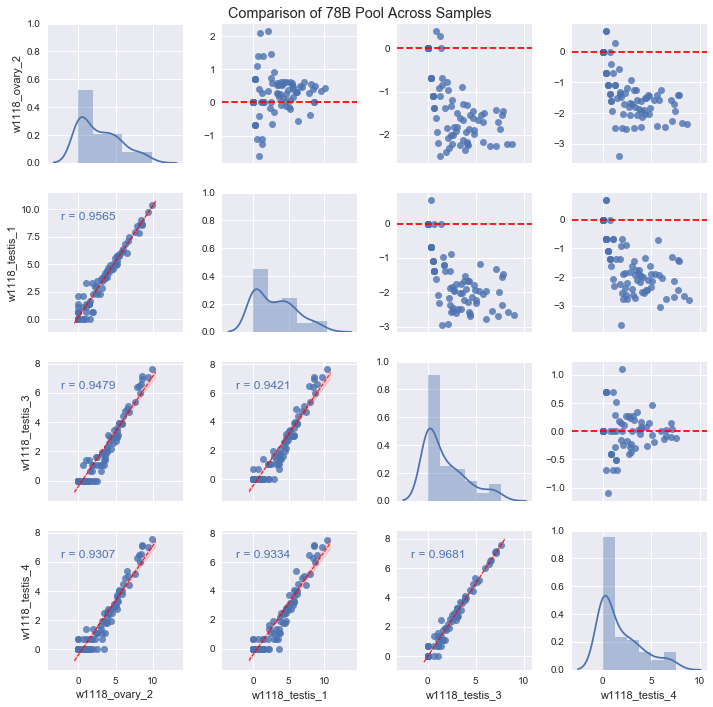

In [84]:
# Plot 78B among others
g = PairGrid(np.log(ercc.loc[:, ('B')] + 1), subplots_kws={'sharey': False})
g.map_lower(sns.regplot, line_kws={'color': 'red', 'ls': '--', 'lw': 1})
g.map_lower(corrfunc, loc=(0.1, 0.8))
g.map_upper(maPlot)
g.map_diag(sns.distplot)
plt.suptitle('Comparison of 78B Pool Across Samples');
plt.tight_layout(rect=[0, 0, 1, .98]);

In [40]:
# Split ERCC into subpools for coloring
erccMeta = pd.read_csv('http://www.jgenomics.com/v04/p0019/jgenv04p0019s1.csv', index_col=0)
erccMetaA = erccMeta[erccMeta['Subpool_in_pool_78'] == 'A'].index.tolist()
erccMetaB = erccMeta[erccMeta['Subpool_in_pool_78'] == 'B'].index.tolist()
erccMetaC = erccMeta[erccMeta['Subpool_in_pool_78'] == 'C'].index.tolist()

In [55]:
# quick plot function for plotting different pairs of samples
def erccPlot(df, index1=0, index2=1):
    maPlot(df.ix[erccMetaA, index1], df.ix[erccMetaA, index2], log=True, label='A')
    maPlot(df.ix[erccMetaB, index1], df.ix[erccMetaB, index2], log=True, color='r', label='B')
    ax = maPlot(df.ix[erccMetaC, index1], df.ix[erccMetaC, index2], log=True, color='k', label='C')
    ax.legend()

### Comparison of ERCC Subpools in Ovary

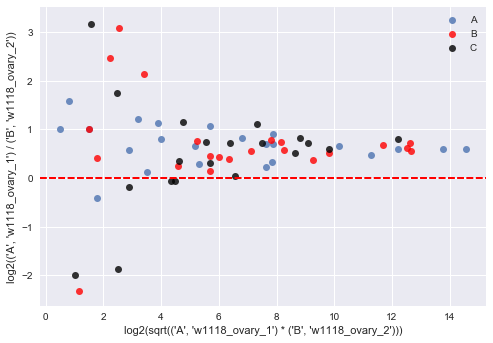

In [57]:
erccPlot(ercc, 0, 1)

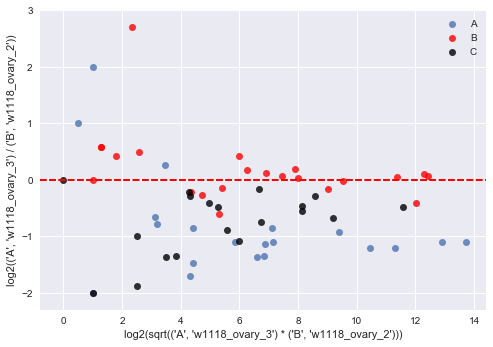

In [58]:
erccPlot(ercc, 2, 1)

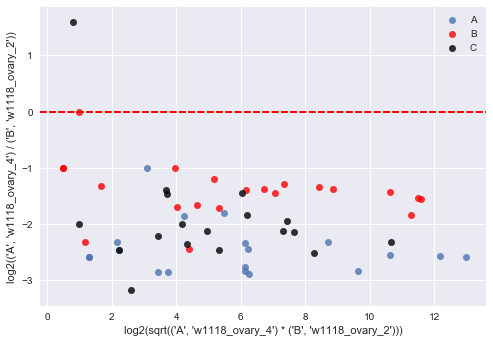

In [59]:
erccPlot(ercc, 3, 1)

### Comparison of ERCC Subpools in Testis

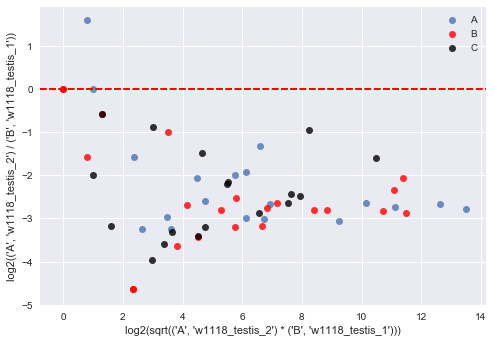

In [70]:
erccPlot(ercc, 5, 4)

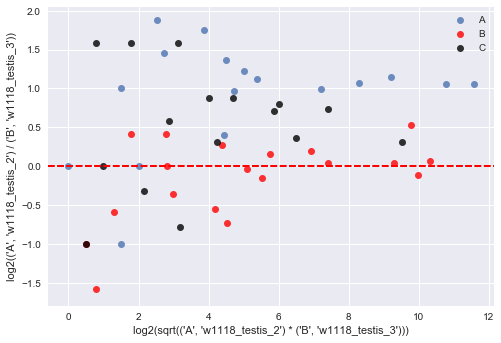

In [75]:
erccPlot(ercc, 5, 6)

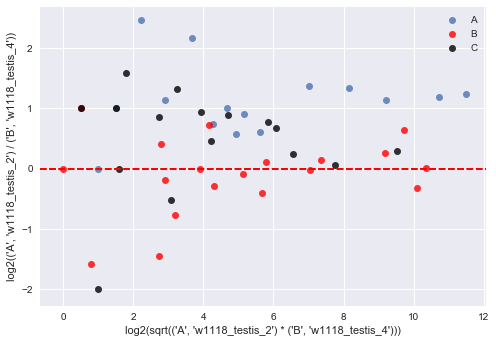

In [76]:
erccPlot(ercc, 5, 7)

In [120]:
sns.regplot?

In [121]:
plt.scatter?